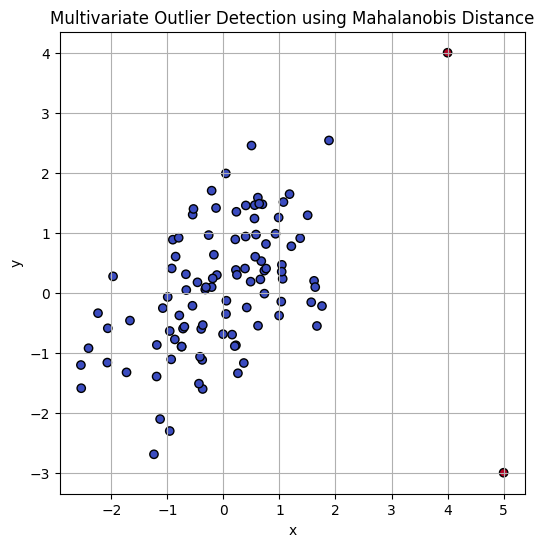

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.spatial.distance import mahalanobis

# Generate multivariate normal data
np.random.seed(0)
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]
data = np.random.multivariate_normal(mean, cov, 100)
outliers = np.array([[4, 4], [5, -3]])
data = np.vstack([data, outliers])
df = pd.DataFrame(data, columns=['x', 'y'])

# Compute Mahalanobis distances
cov_matrix = np.cov(df.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)
mean_distr = df.mean(axis=0).values
df['mahalanobis'] = df.apply(lambda row: mahalanobis(row[['x', 'y']], mean_distr, inv_cov_matrix), axis=1)

# Chi-squared threshold for p=0.01 with 2 degrees of freedom
threshold = np.sqrt(chi2.ppf(0.99, df=2))
df['outlier'] = df['mahalanobis'] > threshold

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(df['x'], df['y'], c=df['outlier'], cmap='coolwarm', edgecolor='k')
plt.title("Multivariate Outlier Detection using Mahalanobis Distance")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()
